# Model training

## Load data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


In [2]:
outdir = "out_p_a1_given_q_xeff"
# import data
data = pd.read_pickle(f"{outdir}/p_a1_given_q_xeff.pkl")

In [3]:
data

,q,xeff,a1,p_a1
0,0.0,-1.0,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1,0.0,-0.8,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
2,0.0,-0.6,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
3,0.0,-0.4,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
4,0.0,-0.2,"[0.0, 0.002004008016032064, 0.0040080160320641...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
...,...,...,...,...
116,1.0,0.2,"[0.0, 0.002004008016032064, 0.0040080160320641...","[1.0680033419862862, 1.0678605941877117, 1.067..."
117,1.0,0.4,"[0.0, 0.002004008016032064, 0.0040080160320641...","[0.7832345001188603, 0.7843442342552497, 0.784..."
118,1.0,0.6,"[0.2064128256513026, 0.2080031807101176, 0.209...","[0.0003581317510958827, 0.0006423405154926148,..."
119,1.0,0.8,"[0.6112224448897795, 0.6120015582266737, 0.612...","[0.003378646421929789, 0.004692188317429458, 0..."


### Some data contains nans, drop them so that they wont cause problems later

In [4]:
data.drop([0,1,2,3,4,5,6,7,8,9,10,11,21,22,32,33,43,44,54,55,65,66,76,77,87,88,98,99,109,110,120], inplace=True)

In [5]:
data.reset_index(drop=True, inplace=True)

Stupid way of getting everything to a numpy array with dtyoe = float64

In [19]:
a1 = []
for i in range(len(data)):
    a1.append(data['a1'][i])
a1 = np.array(a1)
p = []
for i in range(len(data)):
    p.append(data['p_a1'][i])
p = np.array(p)
q = data['q'].values
xeff = data['xeff'].values

## Spliting data into train and test

In [20]:
# split into train and test
from sklearn.model_selection import train_test_split
train_q, test_q, train_xeff, test_xeff, train_p, test_p, train_a1, test_a1 \
= train_test_split(q, xeff, p, a1,
 test_size=0.2, random_state=42)

## Pair q and xeff

In [21]:
train_q_xeff = np.stack((train_q, train_xeff), axis=1)

## Define model

In [28]:
# define model which take input of q, xeff, and a and output p
# input 2 numbers and 1 array, output 1 array with 500 elements
Input1 = keras.Input(shape=(2,)) # q, xeff
Input2 = keras.Input(shape=(500,)) # a1
merged = keras.layers.concatenate([Input1, Input2]) # q, xeff, a1 merged together
output = keras.layers.Dense(500, activation='relu')(merged) # 1 fully connected layer

model = Model(inputs=[Input1,Input2], outputs=output)
model.compile(optimizer='adam',
                loss='mse',
                metrics= ['accuracy'])

history = model.fit([train_q_xeff,train_a1], train_p, epochs=10000, batch_size=32)




Epoch 1/1000
3/3 [==============================] - 0s 2ms/step - loss: 4.2747 - accuracy: 0.0000e+00
Epoch 2/1000
3/3 [==============================] - 0s 2ms/step - loss: 3.3135 - accuracy: 0.0000e+00
Epoch 3/1000
3/3 [==============================] - 0s 3ms/step - loss: 2.9309 - accuracy: 0.0000e+00
Epoch 4/1000
3/3 [==============================] - 0s 2ms/step - loss: 2.8662 - accuracy: 0.0139
Epoch 5/1000
3/3 [==============================] - 0s 3ms/step - loss: 2.8647 - accuracy: 0.0139
Epoch 6/1000
3/3 [==============================] - 0s 4ms/step - loss: 2.8677 - accuracy: 0.0694
Epoch 7/1000
3/3 [==============================] - 0s 2ms/step - loss: 2.8185 - accuracy: 0.0694
Epoch 8/1000
3/3 [==============================] - 0s 2ms/step - loss: 2.7462 - accuracy: 0.0139
Epoch 9/1000
3/3 [==============================] - 0s 2ms/step - loss: 2.6832 - accuracy: 0.0139
Epoch 10/1000
3/3 [==============================] - 0s 3ms/step - loss: 2.6472 - accuracy: 0.0139
Epoch 1

Text(0, 0.5, 'loss')

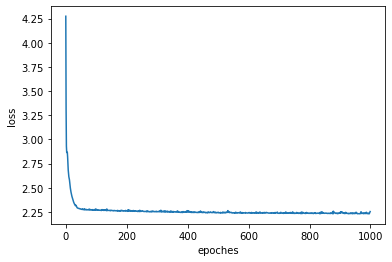

In [29]:
plt.plot(history.history['loss'])
plt.xlabel('epoches')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

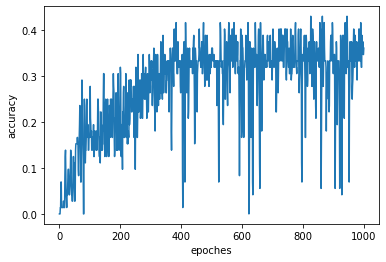

In [30]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoches')
plt.ylabel('accuracy')